# Consolidated Age Visualization

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
file = '../data/voter_turnout_merged_all_states.csv'

In [44]:
df = pd.read_csv(file)

In [45]:
# filtering the columns that we'll use

df = df[['Residence_Addresses_City', 'elec_date', 'elec_year', 'elec_type', 'mean_age', 'voted_voters', 'state']]

In [46]:
df.head(5)

,Residence_Addresses_City,elec_date,elec_year,elec_type,mean_age,voted_voters,state
0,Oakland,2020_11_03,2020,General,47.829424,172221.0,CA
1,Oakland,2018_11_06,2018,General,48.224196,130249.0,CA
2,Oakland,2016_11_08,2016,General,46.819512,135633.0,CA
3,Oakland,2014_11_04,2014,General,51.034918,75153.0,CA
4,San Leandro,2020_11_03,2020,General,49.752550,41879.0,CA


## 1. California

### 1.1 Average Age per Election Type and Election Date

In [47]:
df_ca = df[df['state'] == 'CA']

In [48]:
df_ca['age_x_voters'] = df['mean_age'] * df['voted_voters']

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_6176/2927648849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['age_x_voters'] = df['mean_age'] * df['voted_voters']


In [49]:
df_ca.head(5)

,Residence_Addresses_City,elec_date,elec_year,elec_type,mean_age,voted_voters,state,age_x_voters
0,Oakland,2020_11_03,2020,General,47.829424,172221.0,CA,8.237231e+06
1,Oakland,2018_11_06,2018,General,48.224196,130249.0,CA,6.281153e+06
2,Oakland,2016_11_08,2016,General,46.819512,135633.0,CA,6.350271e+06
3,Oakland,2014_11_04,2014,General,51.034918,75153.0,CA,3.835427e+06
4,San Leandro,2020_11_03,2020,General,49.752550,41879.0,CA,2.083587e+06


In [50]:
df_age_ca = df_ca.groupby(['elec_date', 'elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_age_ca['mean_age'] = df_age_ca['age_x_voters'] / df_age_ca['voted_voters']
df_age_ca

,elec_date,elec_type,voted_voters,age_x_voters,mean_age
0,2011_11_08,Consolidated_General,125865.0,6.675178e+06,53.034428
1,2013_11_05,Consolidated_General,96975.0,5.436420e+06,56.060013
2,2014_11_04,General,1210824.0,6.516536e+07,53.819016
3,2015_04_14,Local_or_Municipal,7634.0,4.434124e+05,58.083891
4,2015_11_03,Consolidated_General,152788.0,8.245694e+06,53.968203
5,2016_11_08,General,2409031.0,1.170268e+08,48.578367
6,2017_02_28,Local_or_Municipal,7246.0,4.170081e+05,57.550114
7,2017_03_07,Local_or_Municipal,12271.0,6.829817e+05,55.658192
8,2017_04_11,Local_or_Municipal,7763.0,4.523195e+05,58.266067
9,2017_11_07,Consolidated_General,7875.0,4.772056e+05,60.597534


In [51]:
df_age_ca_all = df_ca.groupby(['elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_age_ca_all['mean_age'] = df_age_ca_all['age_x_voters'] / df_age_ca_all['voted_voters']
df_age_ca_all

,elec_type,voted_voters,age_x_voters,mean_age
0,Consolidated_General,584708.0,3.193642e+07,54.619425
1,General,9102430.0,4.531211e+08,49.780233
2,Local_or_Municipal,64428.0,3.704910e+06,57.504649


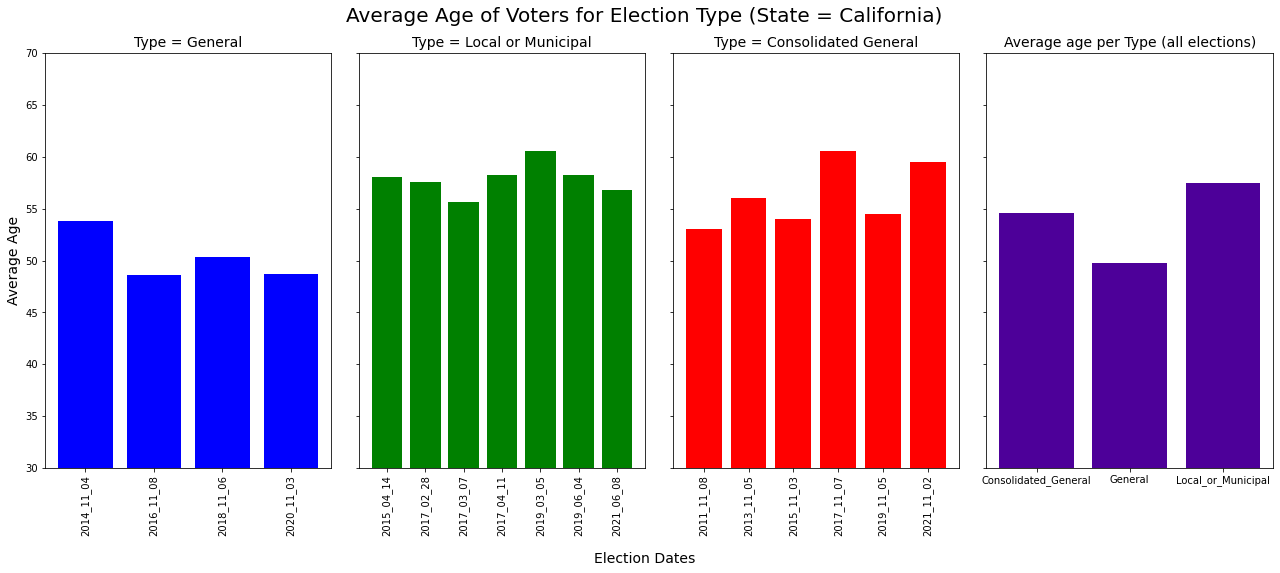

In [60]:
# ploting the graph

fig_age, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (18,8), sharey = True)

#axes[0] = General per election
axes[0].bar((df_age_ca[df_age_ca['elec_type']=='General'])['elec_date'], 
            (df_age_ca[df_age_ca['elec_type']=='General'])['mean_age'],
           color='blue')
axes[0].set_title('Type = General', fontsize=14)
axes[0].set_xticks((df_age_ca[df_age_ca['elec_type']=='General'])['elec_date'], (df_age_ca[df_age_ca['elec_type']=='General'])['elec_date'], rotation='vertical')
axes[0].set_ylabel('Average Age', fontsize=14)
axes[0].set_ylim([30,70])
axes[0].set_yticks(np.arange(30, 75, 5))

#axes[1] = Local or Municipal per election
axes[1].bar((df_age_ca[df_age_ca['elec_type']=='Local_or_Municipal'])['elec_date'], 
            (df_age_ca[df_age_ca['elec_type']=='Local_or_Municipal'])['mean_age'],
           color='green')
axes[1].set_title('Type = Local or Municipal', fontsize=14)
axes[1].set_xticks((df_age_ca[df_age_ca['elec_type']=='Local_or_Municipal'])['elec_date'], (df_age_ca[df_age_ca['elec_type']=='Local_or_Municipal'])['elec_date'], rotation='vertical')

#axes[2] = Consolidated General per election
axes[2].bar((df_age_ca[df_age_ca['elec_type']=='Consolidated_General'])['elec_date'], 
            (df_age_ca[df_age_ca['elec_type']=='Consolidated_General'])['mean_age'],
           color='red')
axes[2].set_title('Type = Consolidated General', fontsize=14)
axes[2].set_xticks((df_age_ca[df_age_ca['elec_type']=='Consolidated_General'])['elec_date'], (df_age_ca[df_age_ca['elec_type']=='Consolidated_General'])['elec_date'], rotation='vertical')

#axes[3] = All types of election
axes[3].bar(df_age_ca_all['elec_type'], 
            df_age_ca_all['mean_age'],
             color=[0.3, 0, 0.6])
axes[3].set_title('Average age per Type (all elections)', fontsize=14)
axes[3].set_xticks(df_age_ca_all['elec_type'], df_age_ca_all['elec_type'], rotation='horizontal')


# Figure
fig_age.supxlabel('Election Dates', fontsize=14)
fig_age.suptitle('Average Age of Voters for Election Type (State = California)', fontsize=20)
fig_age.tight_layout() 

### 1.2 Average age for RCV and Non-RCV Cities

In [62]:
# 1. List of RCV and non-RCV cities

RCV_cities_CA = ['San Francisco',
     'Oakland',
     'Berkeley',
     'San Leandro',
     'Palm Desert',
     'Eureka',
     'Albany']

sampled_nonRCV_cities_CA = ['Fresno',
     'San Diego',
     'Sacramento',
     'Riverside',
     'San Jose',
     'Santa Ana',
     'Anaheim',
     'Santa Rosa',
     'Merced',
     'Santa Clarita',
     'Alhambra',
     'Davis',
     'Montebello',
     'Burbank',
     'Huntington Park',
     'Bellflower',
     'Watsonville',
     'Gilroy',
     'Whittier',
     'Lynwood',
     'Lakewood',
     'Pico Rivera',
     'Lake Forest',
     'Livermore',
     'Chino Hills',
     'Paramount',
     'El Paso de Robles',
     'Pico Rivera',
     'Buena Park',
     'Whittier',
     'Calabasas',
     'Carpinteria',
     'Morro Bay',
     'San Carlos',
     'Solvang']

In [65]:
df_ca_rcv = df_ca[df_ca['Residence_Addresses_City'].isin(RCV_cities_CA)]
df_ca_non_rcv = df_ca[df_ca['Residence_Addresses_City'].isin(sampled_nonRCV_cities_CA)]

In [72]:
df_age_ca_rcv = df_ca_rcv.groupby(['elec_date', 'elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_age_ca_rcv['mean_age'] = df_age_ca_rcv['age_x_voters'] / df_age_ca_rcv['voted_voters']

df_age_ca_non_rcv = df_ca_non_rcv.groupby(['elec_date', 'elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_age_ca_non_rcv['mean_age'] = df_age_ca_non_rcv['age_x_voters'] / df_age_ca_non_rcv['voted_voters']

In [74]:
df_age_ca_rcv_all = df_age_ca_rcv.groupby(['elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_age_ca_rcv_all['mean_age'] = df_age_ca_rcv_all['age_x_voters'] / df_age_ca_rcv_all['voted_voters']

df_age_ca_non_rcv_all = df_age_ca_non_rcv.groupby(['elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_age_ca_non_rcv_all['mean_age'] = df_age_ca_non_rcv_all['age_x_voters'] / df_age_ca_non_rcv_all['voted_voters']

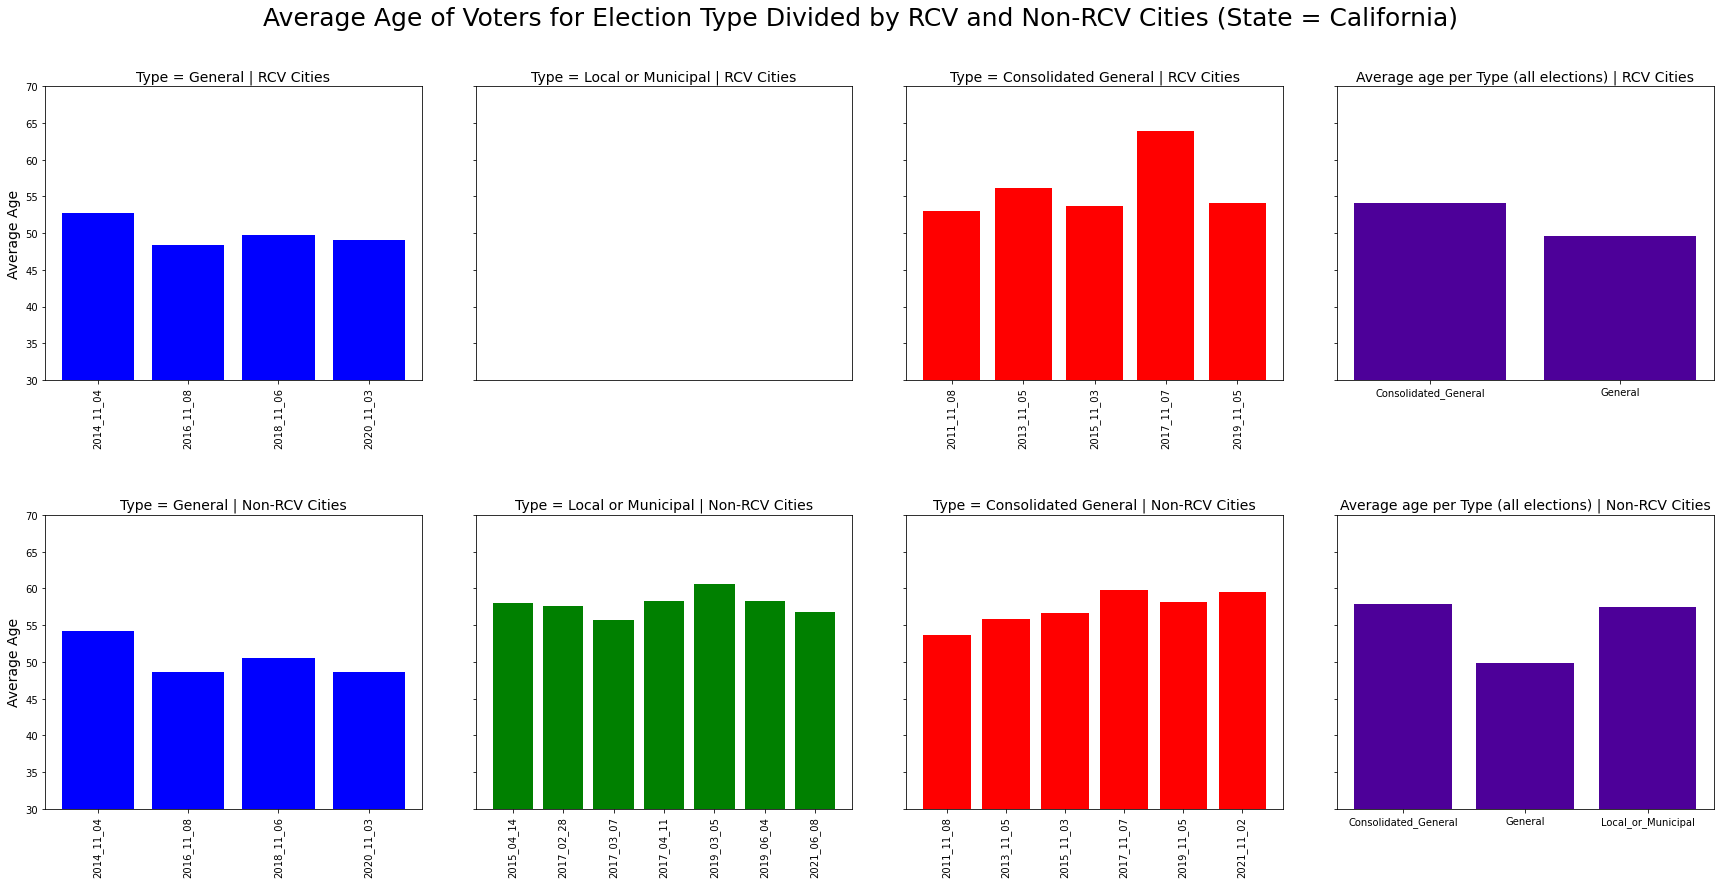

In [75]:
fig_age, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24,12), sharey = True)

# RCV Cities

#axes[0] = General per election for RCV
axes[0,0].bar((df_age_ca_rcv[df_age_ca_rcv['elec_type']=='General'])['elec_date'], 
            (df_age_ca_rcv[df_age_ca_rcv['elec_type']=='General'])['mean_age'],
           color='blue')
axes[0,0].set_title('Type = General | RCV Cities', fontsize=14)
axes[0,0].set_xticks((df_age_ca_rcv[df_age_ca_rcv['elec_type']=='General'])['elec_date'], (df_age_ca_rcv[df_age_ca_rcv['elec_type']=='General'])['elec_date'], rotation='vertical')
axes[0,0].set_ylabel('Average Age', fontsize=14)
axes[0,0].set_ylim([30,70])
axes[0,0].set_yticks(np.arange(30, 75, 5))

#axes[0,1] = Local or Municipal per election for RCV
axes[0,1].bar((df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Local_or_Municipal'])['elec_date'], 
            (df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Local_or_Municipal'])['mean_age'],
           color='green')
axes[0,1].set_title('Type = Local or Municipal | RCV Cities', fontsize=14)
axes[0,1].set_xticks((df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Local_or_Municipal'])['elec_date'], (df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Local_or_Municipal'])['elec_date'], rotation='vertical')

#axes[0,2] = Consolidated General per election for RCV
axes[0,2].bar((df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Consolidated_General'])['elec_date'], 
            (df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Consolidated_General'])['mean_age'],
           color='red')
axes[0,2].set_title('Type = Consolidated General | RCV Cities', fontsize=14)
axes[0,2].set_xticks((df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Consolidated_General'])['elec_date'], (df_age_ca_rcv[df_age_ca_rcv['elec_type']=='Consolidated_General'])['elec_date'], rotation='vertical')

#axes[0,3] = All types of election for RCV
axes[0,3].bar(df_age_ca_rcv_all['elec_type'], 
            df_age_ca_rcv_all['mean_age'],
             color=[0.3, 0, 0.6])
axes[0,3].set_title('Average age per Type (all elections) | RCV Cities', fontsize=14)
axes[0,3].set_xticks(df_age_ca_rcv_all['elec_type'], df_age_ca_rcv_all['elec_type'], rotation='horizontal')

# Non-RCV Cities

#axes[1,0] = General per election for Non-RCV
axes[1,0].bar((df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='General'])['elec_date'], 
            (df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='General'])['mean_age'],
           color='blue')
axes[1,0].set_title('Type = General | Non-RCV Cities', fontsize=14)
axes[1,0].set_xticks((df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='General'])['elec_date'], (df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='General'])['elec_date'], rotation='vertical')
axes[1,0].set_ylabel('Average Age', fontsize=14)
axes[1,0].set_ylim([30,70])
axes[1,0].set_yticks(np.arange(30, 75, 5))

#axes[1,1] = Local or Municipal per election for Non-RCV
axes[1,1].bar((df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Local_or_Municipal'])['elec_date'], 
            (df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Local_or_Municipal'])['mean_age'],
           color='green')
axes[1,1].set_title('Type = Local or Municipal | Non-RCV Cities', fontsize=14)
axes[1,1].set_xticks((df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Local_or_Municipal'])['elec_date'], (df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Local_or_Municipal'])['elec_date'], rotation='vertical')

#axes[0,2] = Consolidated General per election for Non-RCV
axes[1,2].bar((df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Consolidated_General'])['elec_date'], 
            (df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Consolidated_General'])['mean_age'],
           color='red')
axes[1,2].set_title('Type = Consolidated General | Non-RCV Cities', fontsize=14)
axes[1,2].set_xticks((df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Consolidated_General'])['elec_date'], (df_age_ca_non_rcv[df_age_ca_non_rcv['elec_type']=='Consolidated_General'])['elec_date'], rotation='vertical')

#axes[1,3] = All types of election for Non-RCV
axes[1,3].bar(df_age_ca_non_rcv_all['elec_type'], 
            df_age_ca_non_rcv_all['mean_age'],
             color=[0.3, 0, 0.6])
axes[1,3].set_title('Average age per Type (all elections) | Non-RCV Cities', fontsize=14)
axes[1,3].set_xticks(df_age_ca_non_rcv_all['elec_type'], df_age_ca_non_rcv_all['elec_type'], rotation='horizontal')


# Figure
fig_age.suptitle('Average Age of Voters for Election Type Divided by RCV and Non-RCV Cities (State = California)', fontsize=25, y=1.02)
fig_age.tight_layout(h_pad=5, w_pad=5)

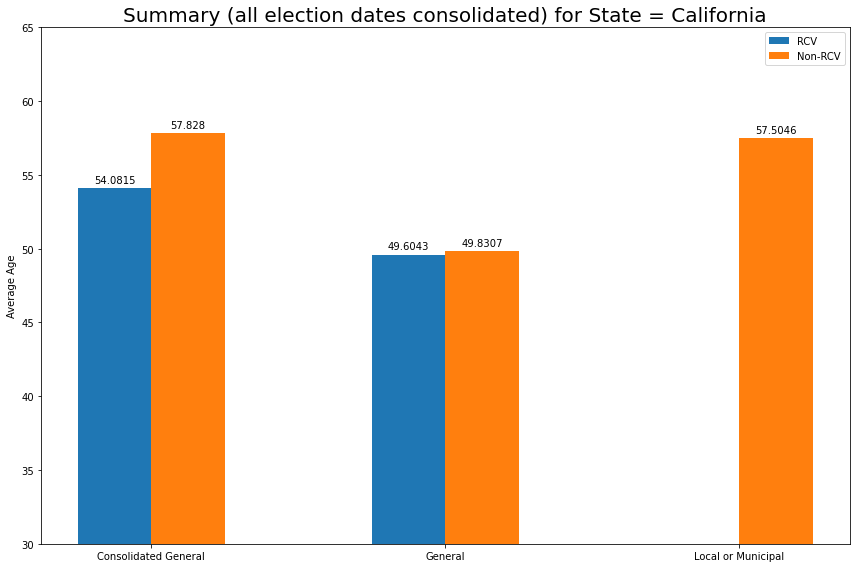

In [83]:
labels = ['Consolidated General', 'General', 'Local or Municipal']
rcv_values = df_age_ca_rcv_all['mean_age'].to_list()
rcv_values.append(0)
non_rcv_values = df_age_ca_non_rcv_all['mean_age'].to_list()

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (12,8))
rcv = ax.bar(x - width/2, rcv_values, width, label = 'RCV')
non_rcv = ax.bar(x + width/2, non_rcv_values, width, label = 'Non-RCV')

ax.bar_label(rcv, padding=3)
ax.bar_label(non_rcv, padding=3)

ax.set_ylabel('Average Age')
ax.set_title("Summary (all election dates consolidated) for State = California", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])
ax.legend()

fig.tight_layout(h_pad=5, w_pad=5)

plt.show()